In [5]:
# Download the data
import os
import urllib.request

datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)


Downloading oecd_bli_2015.csv

Downloading gdp_per_capita.csv

In [9]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # print(gdp_per_capita)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(
        left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True
    )
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[
        keep_indices
    ]


[[5.96242338]]

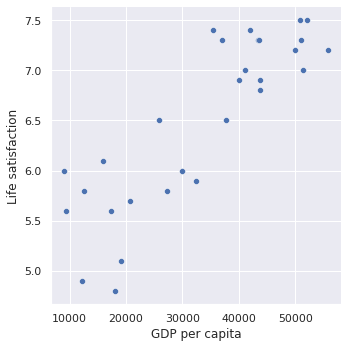

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from rich import print

sns.set_theme(style="darkgrid")

# data loading
oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv(
    "datasets/lifesat/gdp_per_capita.csv",
    thousands=",",
    delimiter="\t",
    encoding="latin1",
    na_values="n/a",
    # encoding='utf-8'
)

# preping data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# visualize the data
sns.relplot(
    kind="scatter", x="GDP per capita", y="Life satisfaction", data=country_stats
)

# select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# make a prediction for Cyprus
X_new = [[22587]]  # Cyprus's GDP per capita
print(model.predict(X_new))


In [11]:
import sklearn.neighbors

model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X, y)

# Make a prediction for Cyprus
print(model1.predict(X_new))


[[5.76666667]]